# Challenge: Preparing a dataset for modeling

Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

When you're done, submit a link to your work below.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#
df = pd.read_csv('~/thinkful_mac/thinkful_large_files/default_of_credit_card_clients.csv', header = 1)

# Data Set Information:

This research aimed at the case of customersâ€™ default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.


# Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 

X6 = the repayment status in September, 2005; 

X7 = the repayment status in August, 2005; . . .;

X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). 

X12 = amount of bill statement in September, 2005; 

X13 = amount of bill statement in August, 2005; . . .; 

X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). 

X18 = amount paid in September, 2005; 

X19 = amount paid in August, 2005; . . .;

X23 = amount paid in April, 2005. 

In [123]:
#pd.get_dummies(df['PAY_0'])
#Variables were renamed in the CSV file
print(df.columns)
df.head()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [125]:
#Create some visualizations with a subset of the variables
df_sub = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'default payment next month']].dropna()

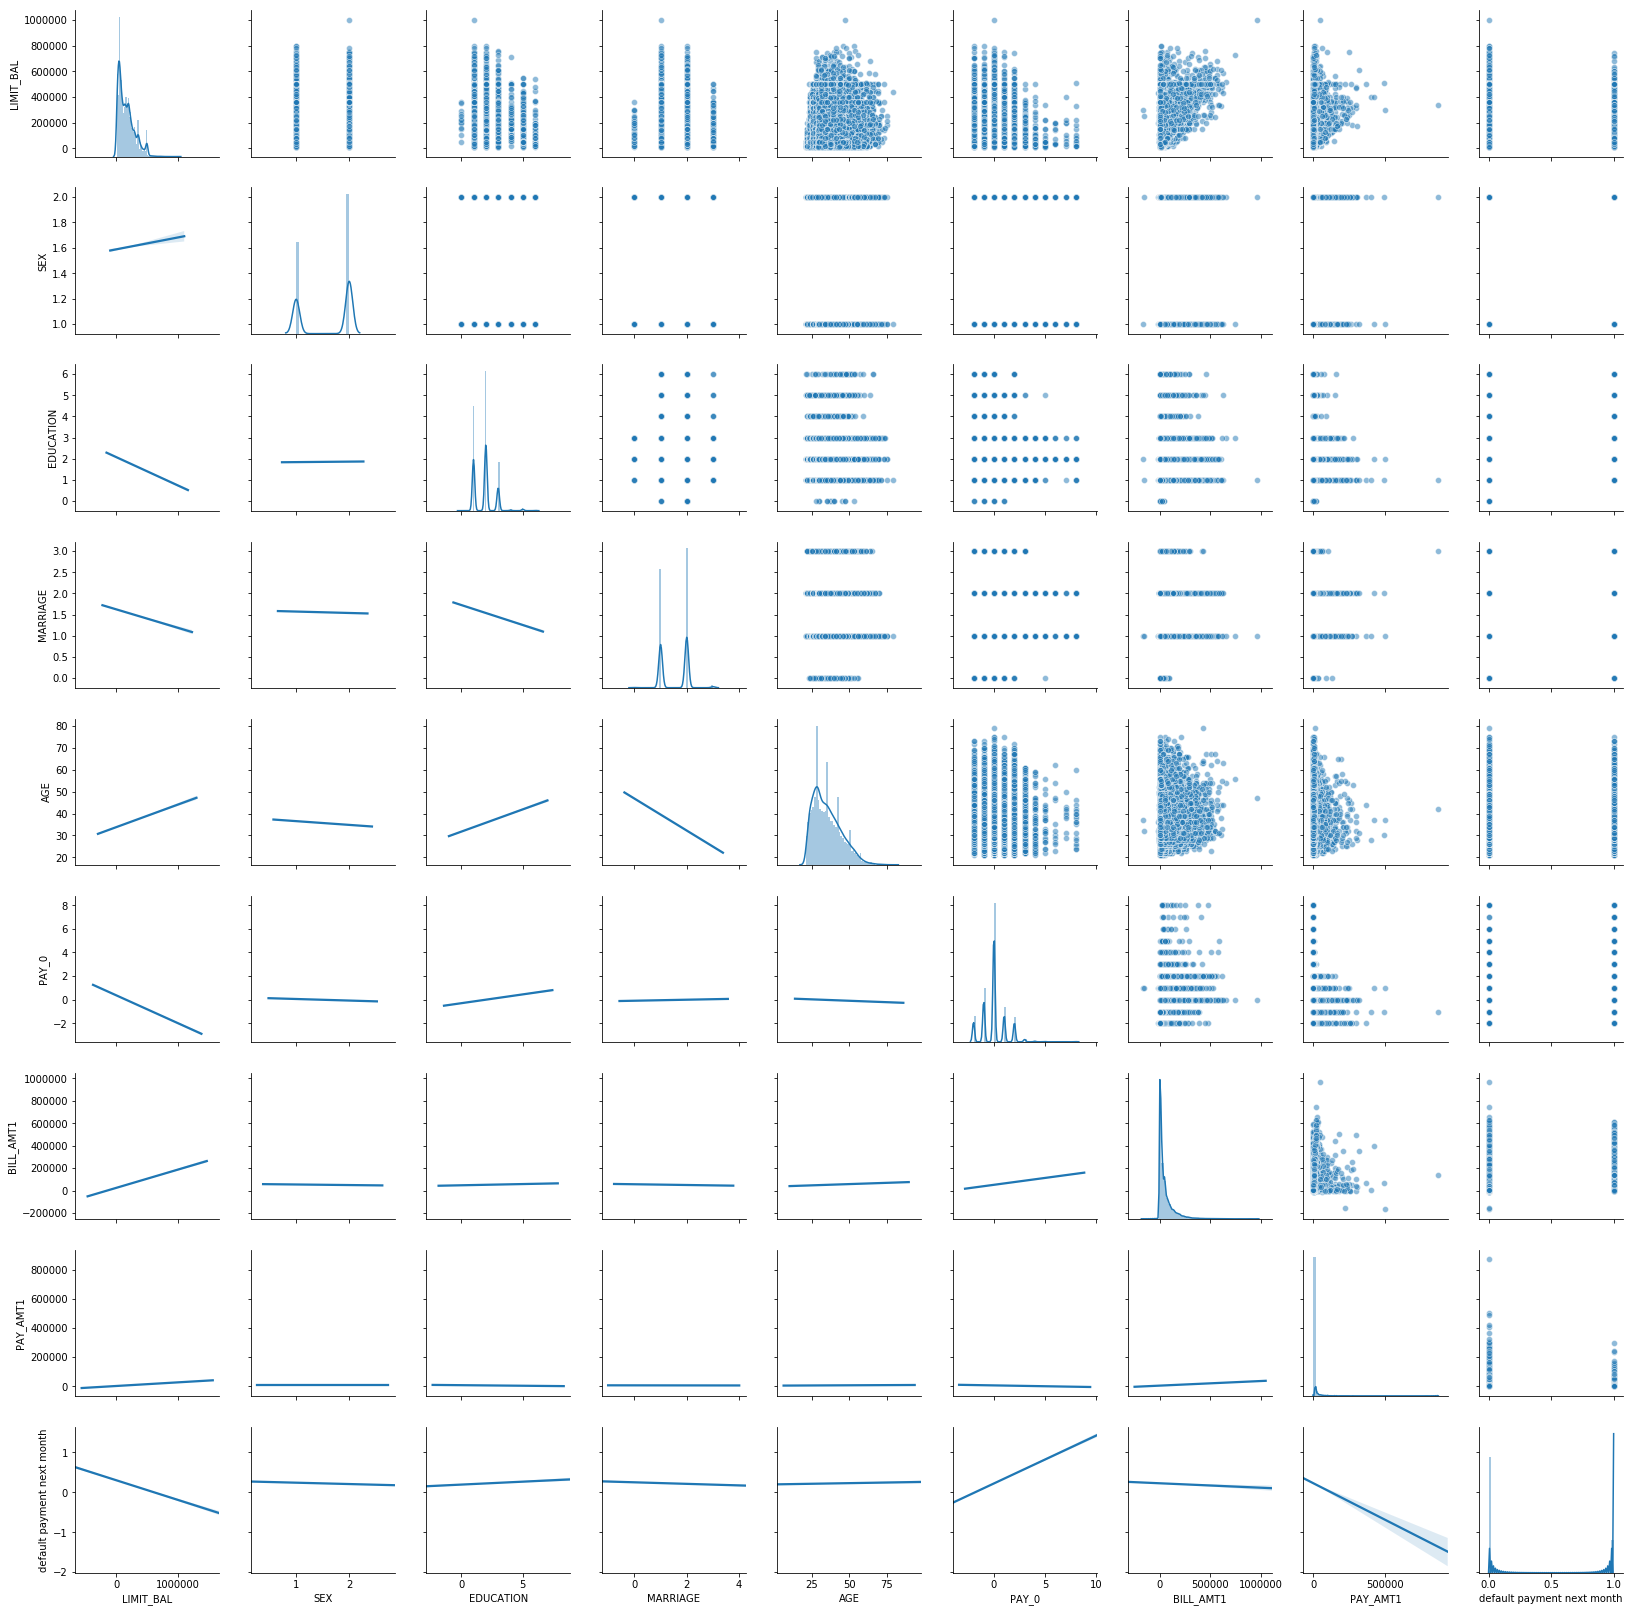

In [25]:
#Create a PairGrid to get a sense of how these variables relate to eachother and to the outcome

g = sns.PairGrid(df_sub, diag_sharey=False)
g.map_upper(sns.scatterplot, x_jitter = 0.2, y_jitter = 0.2, alpha = 0.5)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

The correlation matrix is as follows: 

                             LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
PAY_AMT1                     0.195236 -0.000242  -0.037456 -0.005979   
default payment next month  -0.153520 -0.039961   0.028006 -0.024339   

                                 AGE     PAY_0  BILL_AMT1  PAY_AMT1  \
LIMIT_BAL                   0.144713 -0.271214   0.285430  0.195236   
SEX                        -0.090874 -0.057643  -0.033642 -0.000242   
EDUCATION                

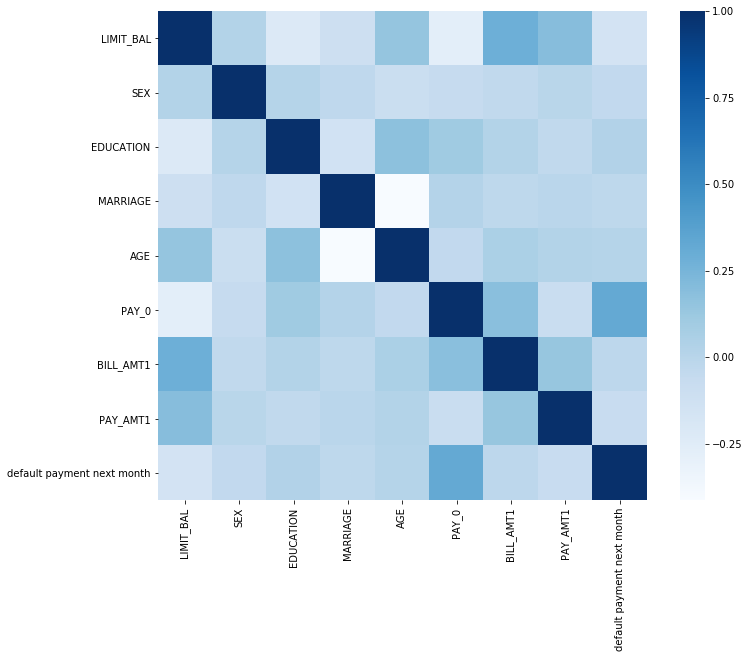

In [43]:
#Now let's create a correlation matrix for another level of visualization

fig, ax = plt.subplots(figsize = (12,9))
corrmat = df_sub.corr()

print('The correlation matrix is as follows: \n\n {}'.format(corrmat))

sns.heatmap(corrmat, cmap = 'Blues', square = True)
plt.show()

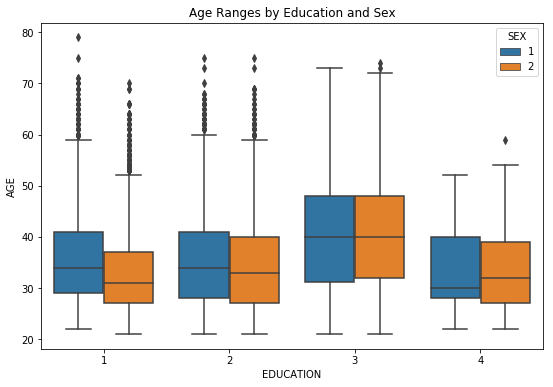

In [109]:
#Plot a few categorical variables cross-tabbed with some continuous ones
fig, ax = plt.subplots(figsize=(9,6))
sns.boxplot(data=df_sub[((df_sub['EDUCATION']>0)&(df_sub['EDUCATION']<=4))], x='EDUCATION', y='AGE', hue='SEX')
plt.title('Age Ranges by Education and Sex')
plt.show()


In [107]:
crosstab = pd.crosstab(df_sub[((df_sub.EDUCATION <= 4)&(df_sub.EDUCATION >= 1))]['EDUCATION'], df_sub['default payment next month'])

default payment next month      0     1
EDUCATION                              
1                            8549  2036
2                           10700  3330
3                            3680  1237
4                             116     7


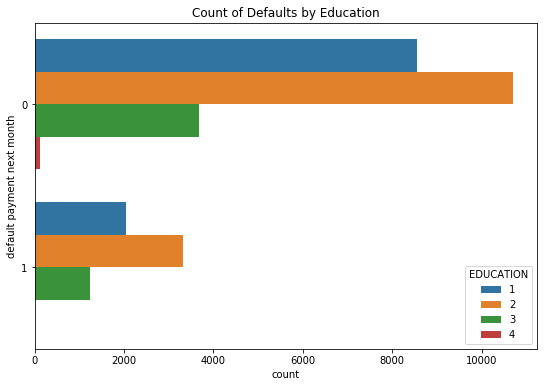

In [108]:
print(crosstab)
fig, ax = plt.subplots(figsize=(9,6))
sns.countplot(data=df_sub[((df_sub['EDUCATION']>0)&(df_sub['EDUCATION']<=4))], y='default payment next month', hue='EDUCATION')
plt.title('Count of Defaults by Education')
plt.show()

In [114]:
#Show summary statistics grouped by a categorical variable
df_sub[['EDUCATION', 'default payment next month']].groupby('EDUCATION').describe().transpose()

EDUCATION                            0             1             2  \
default payment next month count  14.0  10585.000000  14030.000000   
                           mean    0.0      0.192348      0.237349   
                           std     0.0      0.394163      0.425473   
                           min     0.0      0.000000      0.000000   
                           25%     0.0      0.000000      0.000000   
                           50%     0.0      0.000000      0.000000   
                           75%     0.0      0.000000      0.000000   
                           max     0.0      1.000000      1.000000   

EDUCATION                                   3           4           5  \
default payment next month count  4917.000000  123.000000  280.000000   
                           mean      0.251576    0.056911    0.064286   
                           std       0.433963    0.232619    0.245700   
                           min       0.000000    0.000000    0.000000   
                           25%       0.000000    0.000000    0.000000   
                           50%       0.000000    0.000000    0.000000   
                           75%       1.000000    0.000000    0.000000   
                           max       1.000000    1.000000    1.000000   

EDUCATION                                 6  
default payment next month count  51.000000  
                           mean    0.156863  
                           std     0.367290  
                           min     0.000000  
                           25%     0.000000  
                           50%     0.000000  
                           75%     0.000000  
                           max     1.000000

In [118]:
#Let's see if those means are statistically different from one another
import scipy.stats as stats

print('Graduate School (1) vs. University (2)')
print(stats.ttest_ind(df_sub[df_sub.EDUCATION == 1]['default payment next month'] , 
                      df_sub[df_sub.EDUCATION == 2]['default payment next month']))

print('Graduate School (1) vs. High School (3)')
print(stats.ttest_ind(df_sub[df_sub.EDUCATION == 1]['default payment next month'] , 
                      df_sub[df_sub.EDUCATION == 3]['default payment next month']))

print('University (2) vs. High School (3)')
print(stats.ttest_ind(df_sub[df_sub.EDUCATION == 2]['default payment next month'] , 
                      df_sub[df_sub.EDUCATION == 3]['default payment next month']))

Graduate School (1) vs. University (2)
Ttest_indResult(statistic=-8.47776293848955, pvalue=2.4225777058988602e-17)
Graduate School (1) vs. High School (3)
Ttest_indResult(statistic=-8.427843516071551, pvalue=3.827156517555278e-17)
University (2) vs. High School (3)
Ttest_indResult(statistic=-2.0072889695168663, pvalue=0.044733079661457655)


In [132]:
#All three means are different from one another at the p = 0.05 level.

In [133]:
#Now let's do some feature engineering

df2 = df_sub.copy()
#FEATURES 1-3

#Feature 1: bill_amt1 / Limit_bal. Useful because we are seeing what % of available credit is being used - credit hungry?
df2['feat1'] = df2['BILL_AMT1'] / df2['LIMIT_BAL']

#Feature 2: pay_amt1 / bill_amt1. Useful because we are seeing what % of the bill the person pays that month
df2['feat2'] = df2['PAY_AMT1'] / df2['BILL_AMT1'] 

df2['feat3'] = np.where(df2['AGE']<=18, 'LTE 18', np.where(df2['AGE']<=30, '19-30', np.where(df2.AGE<=40, '31-40',
np.where(df2.AGE<=50, '41-50', np.where(df2.AGE<=60, '51-60', np.where(df2.AGE<=70, '61-70', '70+'))))))
    
df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat3
0,20000,2,2,1,24,2,3913,0,1,0.195650,0.000000,19-30
1,120000,2,2,2,26,-1,2682,0,1,0.022350,0.000000,19-30
2,90000,2,2,2,34,0,29239,1518,0,0.324878,0.051917,31-40
3,50000,2,2,1,37,0,46990,2000,0,0.939800,0.042562,31-40
4,50000,1,2,1,57,-1,8617,2000,0,0.172340,0.232099,51-60


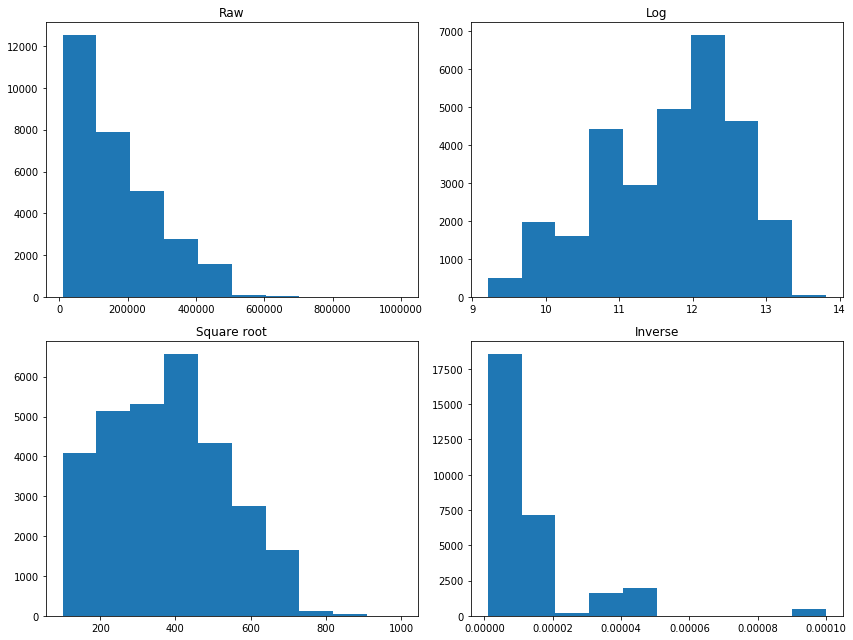

In [136]:
# FEATURES 4-6

fig = plt.figure(figsize=(12,9))

fig.add_subplot(221)
plt.hist(df2['LIMIT_BAL'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df2['LIMIT_BAL'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df2['LIMIT_BAL'].dropna()))
plt.title('Square root')

fig=fig.add_subplot(224)
plt.hist(1/df2['LIMIT_BAL'].dropna())
plt.title('Inverse')
plt.tight_layout()
plt.show()

#Feature 4: Log fcn looks more normal than 'raw' for LIMIT_BAL; will use it as a feature for test purposes
df2['feat4'] = np.log(df2['LIMIT_BAL'].dropna())


#Feature 5: Sqrt fcn looks more normal than 'raw' for LIMIT_BAL; will use it as a feature for test purposes
df2['feat5'] = np.sqrt(df2['LIMIT_BAL'].dropna())


#Feature 6: Available credit minus used credit
df2['feat6'] = df2['LIMIT_BAL'] - df2['BILL_AMT1']

In [137]:
# FEATURE 7

#Feature 7: Will try the ratio of pay_amt1 / limit_bal to see if high payments relative to credit line affect the outcome
df2['feat7'] = df2['PAY_AMT1'] / df2['LIMIT_BAL']



In [139]:
#FEATURES 8, 9, and 10 will take the continuous numerical variables for LIMIT_BAL, PAY_AMT1, and BILL_AMT1 and normalize them
from sklearn import preprocessing

# Select only numeric variables to scale.
df_num = df2.loc[:, 'LIMIT_BAL' : 'PAY_AMT1'].select_dtypes(include=[np.number]).dropna()

# Save the column names.
names=df_num.columns

# Scale, then turn the resulting numpy array back into a data frame with the
# correct column names.
df_scaled = pd.DataFrame(preprocessing.scale(df_num), columns=names)

# The new features contain all the information of the old ones, but on a new scale.
#plt.scatter(df_num['LIMIT_BAL'], df_scaled['LIMIT_BAL'])
#plt.show()

# Lookit all those matching means and standard deviations!
#print(df_scaled.describe())


df2['feat8'] = df_scaled['LIMIT_BAL']
df2['feat9'] = df_scaled['BILL_AMT1']
df2['feat10'] = df_scaled['PAY_AMT1']

df2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,BILL_AMT1,PAY_AMT1,default payment next month,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10
0,20000,2,2,1,24,2,3913,0,1,0.195650,0.000000,19-30,9.903488,141.421356,16087,0.000000,-1.136720,-0.642501,-0.341942
1,120000,2,2,2,26,-1,2682,0,1,0.022350,0.000000,19-30,11.695247,346.410162,117318,0.000000,-0.365981,-0.659219,-0.341942
2,90000,2,2,2,34,0,29239,1518,0,0.324878,0.051917,31-40,11.407565,300.000000,60761,0.016867,-0.597202,-0.298560,-0.250292
3,50000,2,2,1,37,0,46990,2000,0,0.939800,0.042562,31-40,10.819778,223.606798,3010,0.040000,-0.905498,-0.057491,-0.221191
4,50000,1,2,1,57,-1,8617,2000,0,0.172340,0.232099,51-60,10.819778,223.606798,41383,0.040000,-0.905498,-0.578618,-0.221191


In [165]:
correlations = pd.DataFrame(df2.corr().loc[:, 'default payment next month'])

In [174]:
#Filtering: Take the top 5 variable correlations to the outcome of interest and use them as our features 
abs(correlations).sort_values(by='default payment next month', ascending=False)

,default payment next month
default payment next month,1.000000
PAY_0,0.324794
feat4,0.173571
feat5,0.167079
feat8,0.153520
LIMIT_BAL,0.153520
feat6,0.142506
feat1,0.086168
PAY_AMT1,0.072929
feat10,0.072929
